# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

In [1]:
# Importe de bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from util import mask_corr_graphic

# 1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
# Importando os dados
link = "https://raw.githubusercontent.com/gfsilveira/ebac/main/"
link += "03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo_10/"
link += "Profissao-%20Cientista%20de%20Dados_M10_support%20material.csv"

df = pd.read_csv(link)
df.drop(["Unnamed: 0","index"], axis=1, inplace=True)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
# Selecionando apenas as variáveis de interesse
df_quantitativas = df.select_dtypes(["float64","int64"]).copy()
df_quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   qtd_filhos             15000 non-null  int64  
 1   idade                  15000 non-null  int64  
 2   tempo_emprego          12466 non-null  float64
 3   qt_pessoas_residencia  15000 non-null  float64
 4   renda                  15000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 586.1 KB


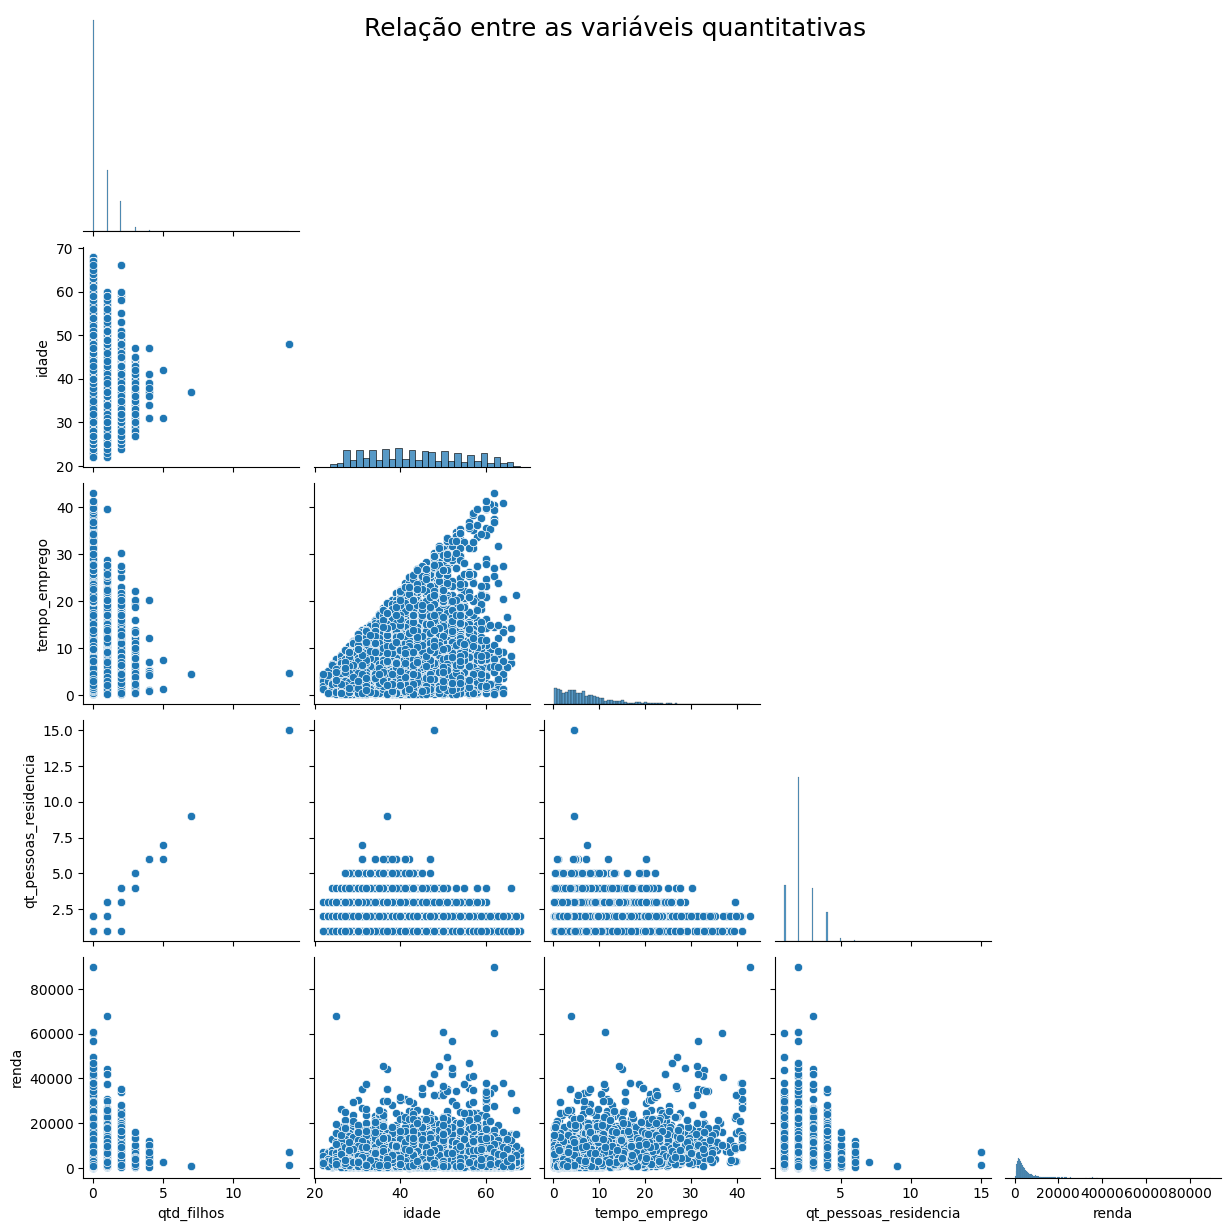

In [4]:
# Verificando a relação entre as variáveis quantitativas
g = sns.pairplot(data=df_quantitativas, corner=True)

g.fig.suptitle("Relação entre as variáveis quantitativas", size=18)

plt.show()

In [5]:
# Obtendo a correlação entre as variáveis quantitativas
df_corr_quantitativas = df_quantitativas.corr()
df_corr_quantitativas

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


In [6]:
# Obtendo a mascara de valores superiores a diagonal principal
mask = mask_corr_graphic(len(df_corr_quantitativas))
mask

array([[False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True],
       [False, False, False, False, False]])

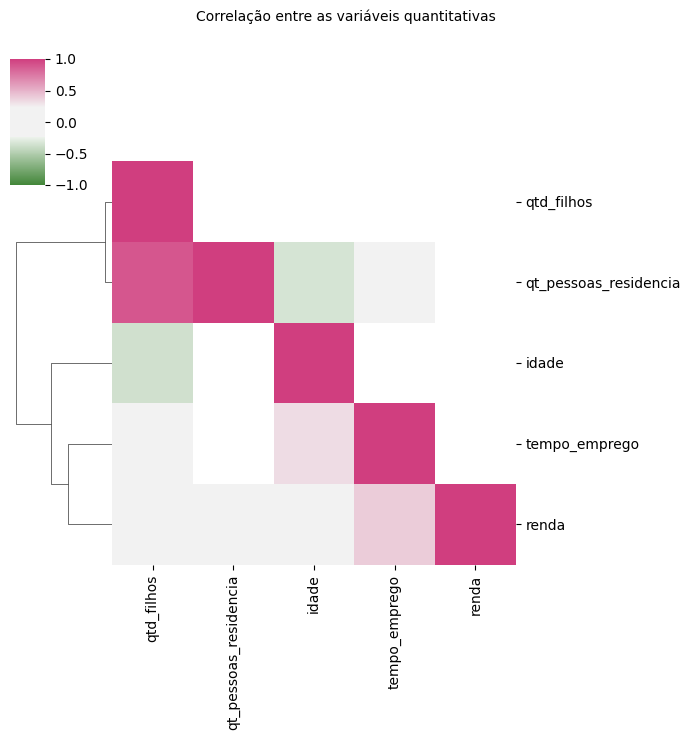

In [7]:
# Plotando as correlações
cmap = sns.diverging_palette(
    h_neg=125,
    h_pos=350,
    as_cmap=True,
    sep=60,
    center="light"
)

g = sns.clustermap(
    data=df_corr_quantitativas,
    figsize=(7,7),
    center=0,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    mask=mask
)
g.ax_col_dendrogram.set_visible(False)
g.fig.suptitle("Correlação entre as variáveis quantitativas", y=1.05, size=10)

plt.show()

## Conclusão

- Pela análise dos gráficos, a quantidade de pessoas residentes e a quantidade de filhos apresentam uma clara correlação positiva.
<br>
- Em menor intensidade, ocorre uma correlação postiva do tempo de emprego com renda e com idade.
<br>
- Já a idade é negativamente correlacionada com quantidade de filhos e residentes.
<br>
- Renda e tempo de emprego têm relação neutra com filhos e pessoas residentes, bem como renda e idade.



---



# 2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [8]:
# Verificando os valores de correlação com a renda
df_corr_quantitativas.renda.sort_values()

qtd_filhos               0.009567
qt_pessoas_residencia    0.020977
idade                    0.042570
tempo_emprego            0.394235
renda                    1.000000
Name: renda, dtype: float64

In [9]:
# Instanciando lista com as variáveis com maior correlação com a renda
top_correla_renda = df_corr_quantitativas.renda.nlargest(3).index
top_correla_renda

Index(['renda', 'tempo_emprego', 'idade'], dtype='object')

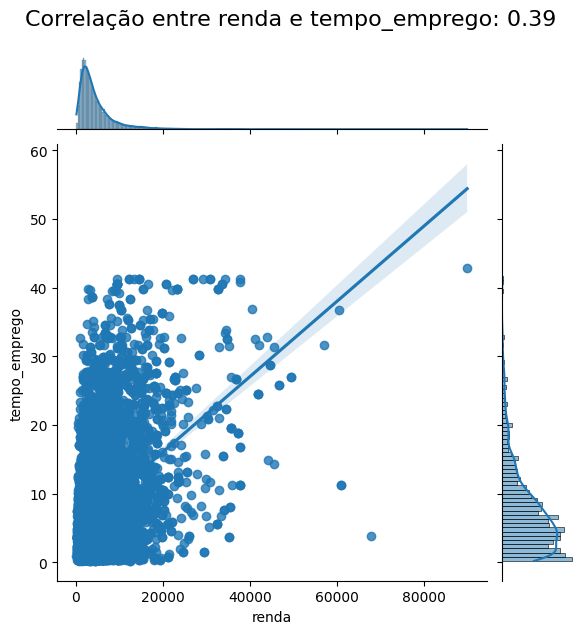

In [10]:
# Plot da variável com a maior correlação com a renda
x = top_correla_renda[0]
y = top_correla_renda[1]
c = df_corr_quantitativas.loc[y,x].round(2)
title = f"Correlação entre {x} e {y}: {c}"
sns.jointplot(
    x=x,
    y=y,
    kind="reg",
    data=df_quantitativas
)
plt.suptitle(title, y=1.05, size=16)
plt.show()

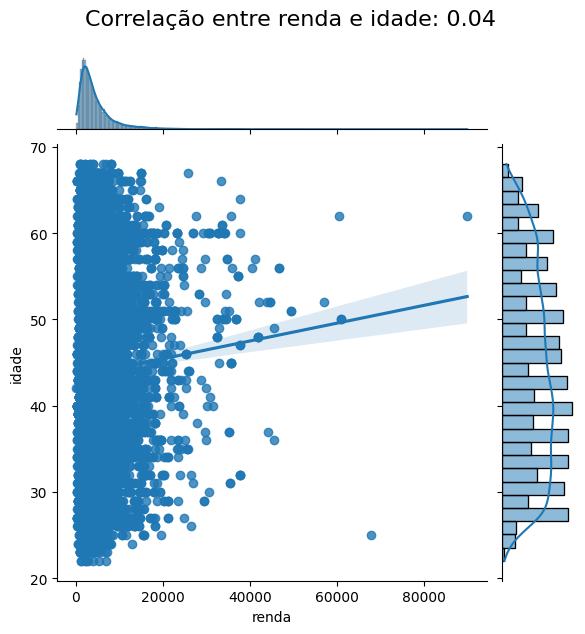

In [11]:
# Plot da variável com a segunda maior correlação com a renda
y = top_correla_renda[2]
c = df_corr_quantitativas.loc[y,x].round(2)
title = f"Correlação entre {x} e {y}: {c}"
sns.jointplot(
    x=x,
    y=y,
    kind="reg",
    data=df_quantitativas
)
plt.suptitle(title, y=1.05, size=16)
plt.show()

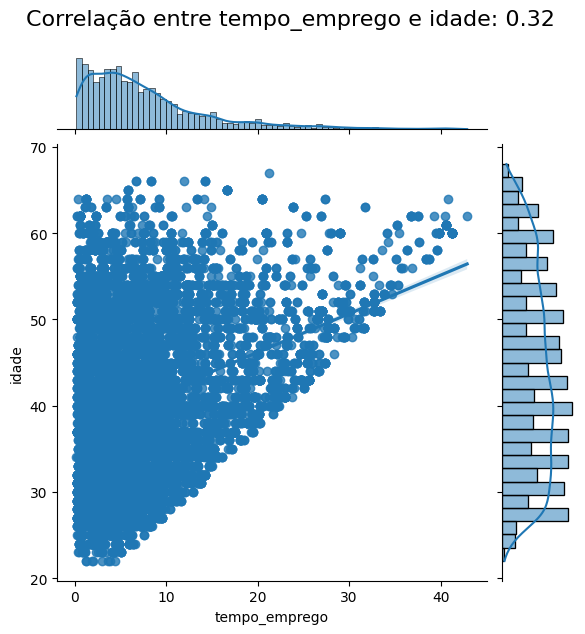

In [12]:
# Plot das variáveis com a maior correlação com renda
x = top_correla_renda[1]
y = top_correla_renda[2]
c = df_corr_quantitativas.loc[y,x].round(2)
title = f"Correlação entre {x} e {y}: {c}"
sns.jointplot(
    x=x,
    y=y,
    kind="reg",
    data=df_quantitativas
)
plt.suptitle(title, y=1.05, size=16)
plt.show()

## Conclusão

- Observa-se uma correlação média, 0,39, entre a renda e o tempo de emprego. A segunda maior, 0,04, sendo considerada correlação neutra, é da renda com a idade.

- Renda e tempo de emprego têm uma distribuição assimétrica a esquerda, já para idade a distribuição é homogênea.

- Os gráficos de dispersão mostram que, provavelmente, a correlação positiva se dá devido a outliers.



---



# 3) Na sua opinião, há outliers na variável renda?

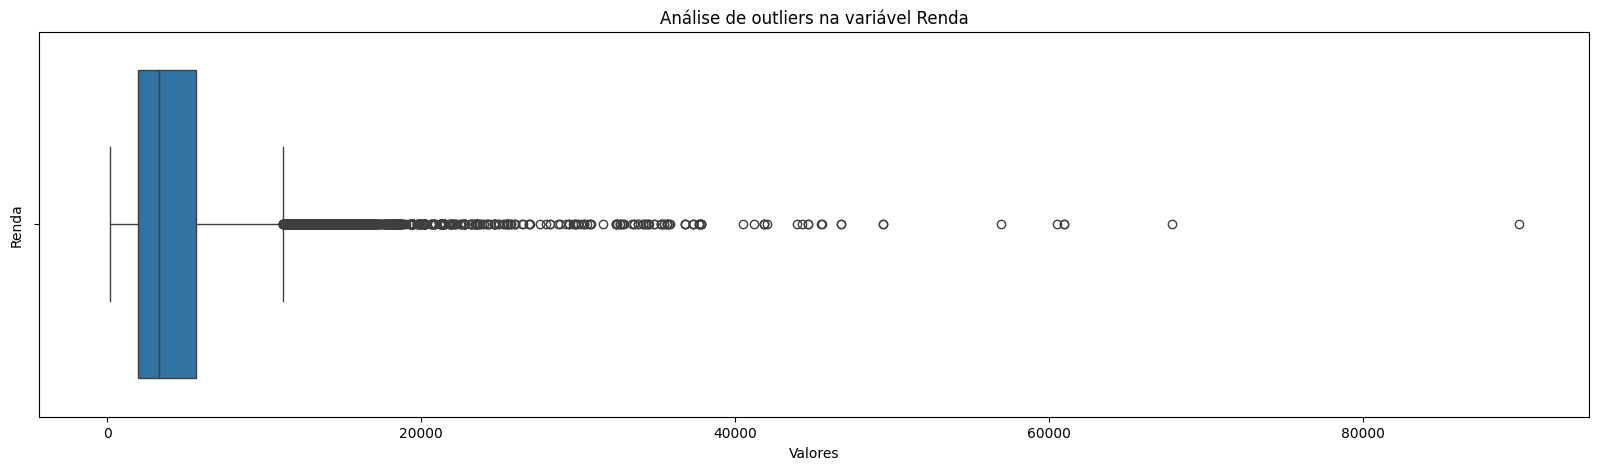

In [13]:
plt.figure(figsize=(20,5))
plt.title("Análise de outliers na variável Renda")
sns.boxplot(
    x="renda",
    data=df_quantitativas
)
plt.xlabel("Valores")
plt.ylabel("Renda")
plt.show()

## Conclusão

- Como observado no boxplot, sim, muito outliers estao presentes na variável renda.



---



# 4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [14]:
# Inserindo o log da renda na DataFrame
df_quantitativas['renda_log'] = np.log(df_quantitativas.renda)
df_quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   qtd_filhos             15000 non-null  int64  
 1   idade                  15000 non-null  int64  
 2   tempo_emprego          12466 non-null  float64
 3   qt_pessoas_residencia  15000 non-null  float64
 4   renda                  15000 non-null  float64
 5   renda_log              15000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 703.2 KB


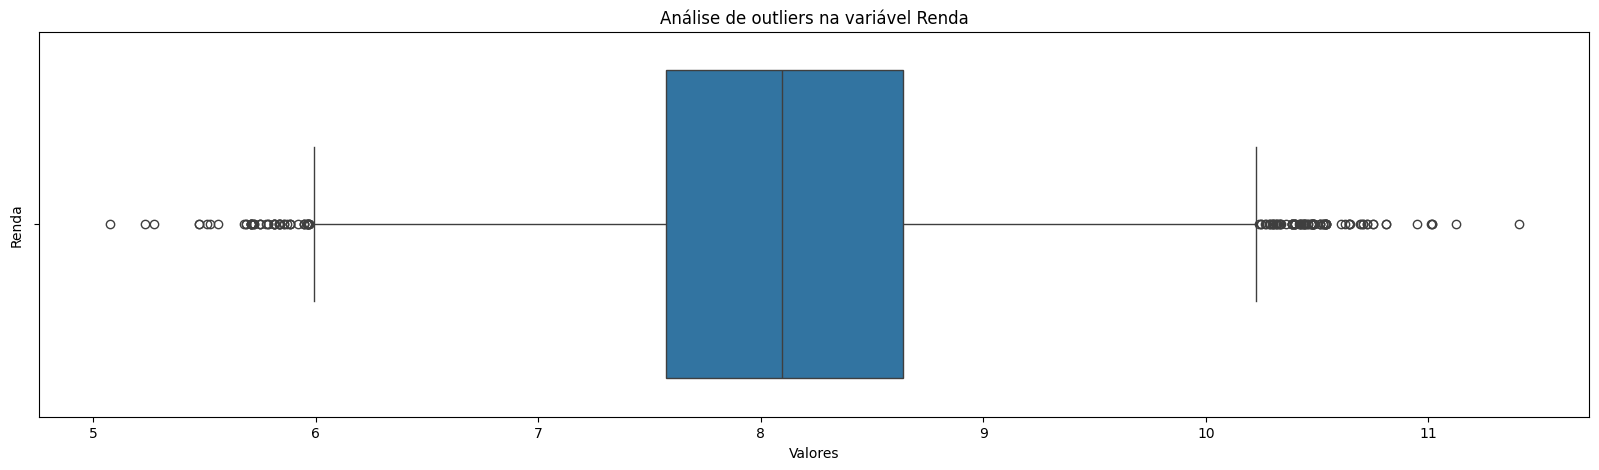

In [15]:
# Plot da renda em log
plt.figure(figsize=(20,5))
plt.title("Análise de outliers na variável Renda")
sns.boxplot(
    x="renda_log",
    data=df_quantitativas
)
plt.xlabel("Valores")
plt.ylabel("Renda")
plt.show()

In [16]:
# Obtendo a correlação entre as variáveis quantitativas
df_corr_quantitativas = df_quantitativas.corr()
df_corr_quantitativas

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
renda_log,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


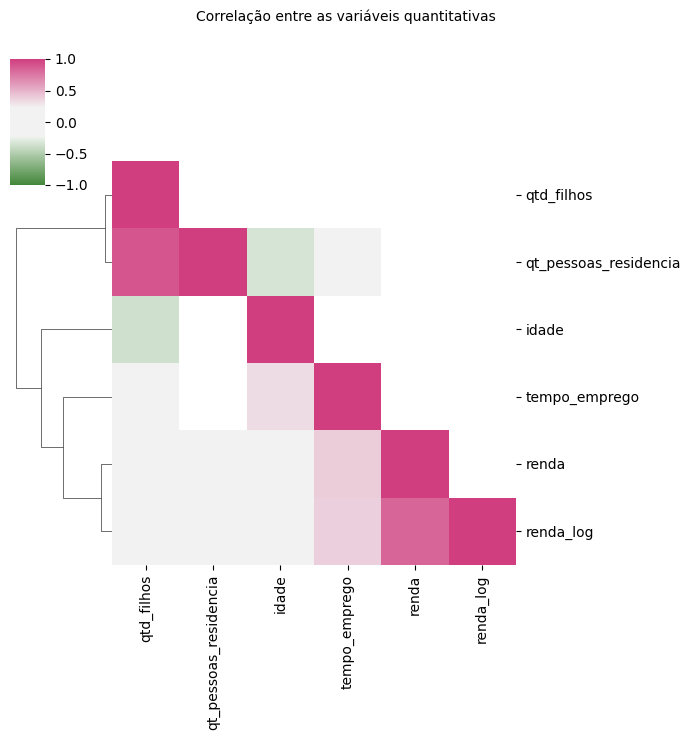

In [17]:
# Obtendo a mascara de valores superiores a diagonal principal
mask = mask_corr_graphic(len(df_corr_quantitativas))

# Plotando as correlações
cmap = sns.diverging_palette(
    h_neg=125,
    h_pos=350,
    as_cmap=True,
    sep=60,
    center="light"
)

g = sns.clustermap(
    data=df_corr_quantitativas,
    figsize=(7,7),
    center=0,
    cmap=cmap,
    vmin=-1,
    vmax=1,
    mask=mask
)
g.ax_col_dendrogram.set_visible(False)
g.fig.suptitle("Correlação entre as variáveis quantitativas", y=1.05, size=10)

plt.show()

In [18]:
# Verificando os valores de correlação com a renda
df_corr_quantitativas.renda_log.sort_values()

qtd_filhos               0.023743
idade                    0.024712
qt_pessoas_residencia    0.036267
tempo_emprego            0.379556
renda                    0.835734
renda_log                1.000000
Name: renda_log, dtype: float64

In [19]:
# Instanciando lista com as variáveis com maior correlação com a renda
top_correla_renda = df_corr_quantitativas.renda_log.nlargest(3).index
top_correla_renda

Index(['renda_log', 'renda', 'tempo_emprego'], dtype='object')

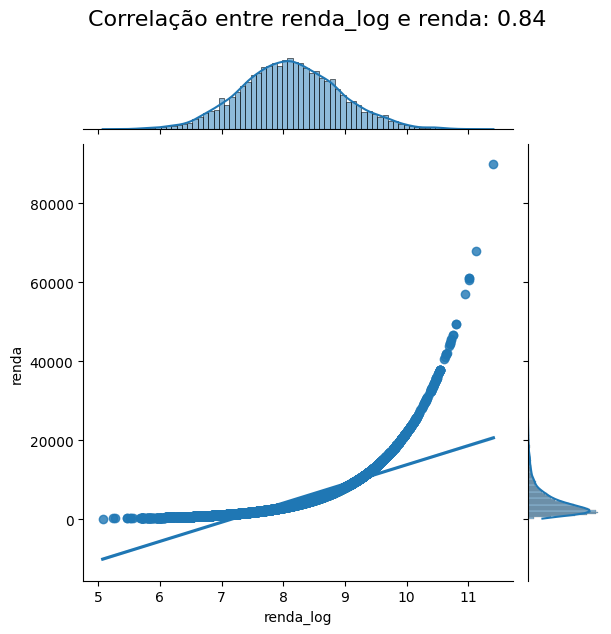

In [20]:
# Plot da variável com a maior correlação com a renda
x = top_correla_renda[0]
y = top_correla_renda[1]
c = df_corr_quantitativas.loc[y,x].round(2)
title = f"Correlação entre {x} e {y}: {c}"
sns.jointplot(
    x=x,
    y=y,
    kind="reg",
    data=df_quantitativas
)
plt.suptitle(title, y=1.05, size=16)
plt.show()

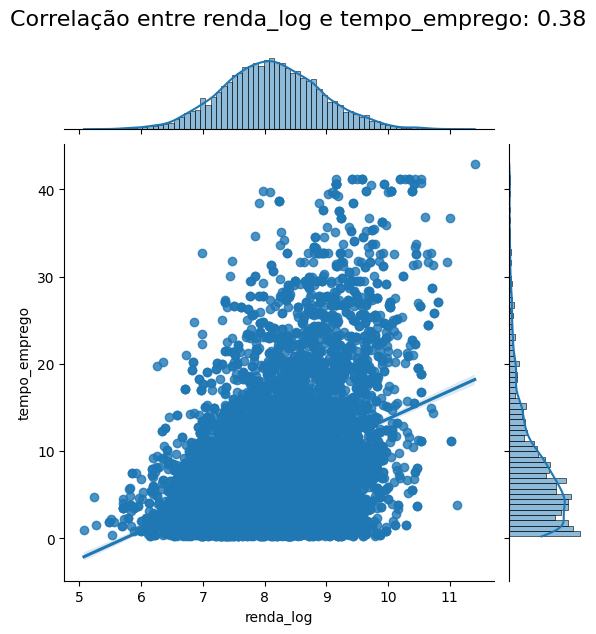

In [21]:
# Plot da variável com a maior correlação com a renda
y = top_correla_renda[2]
c = df_corr_quantitativas.loc[y,x].round(2)
title = f"Correlação entre {x} e {y}: {c}"
sns.jointplot(
    x=x,
    y=y,
    kind="reg",
    data=df_quantitativas
)
plt.suptitle(title, y=1.05, size=16)
plt.show()

## Conclusão

- A transformação da variável renda com log modifica a distribuição para uma normal. Essa transformação fez que a variável idade não estivesse mais entre as maiores correlações com a renda log.

- A variável tempo de emprego teve um aumento de correlação com a renda transformada, porém, a distribuição mostra que essa ainda não é uma correlação forte, 0,38.

- A análise de distribuição entre renda e renda log mostra que a variável renda têm uma distibuição exponencial.



---



# 5) A aplicação do LOG você acha que melhorou ou piorou a análise?

## Conclusão

- Diria que sim, a análise melhorou, pois foi possível observar mais detalhes quanto a distribuição da renda e a sua correlação com outras variáveis. Porém, as conclusões gerais em relação a análise não se modificaram.